<a href="https://colab.research.google.com/github/MansiGit/Amazon-Gourmet-Groceries-Recommendar-System/blob/main/EDA_of_MDM_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
!ls drive/MyDrive/MDM_Project_Team12/data


Grocery_and_Gourmet_Food_5.json
meta_Grocery_and_Gourmet_Food.json
meta_Grocery_and_Gourmet_Food.json.to_pickle


In [28]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

##2. Exploratory Data Analysis


In [29]:
merged_df = pd.read_pickle('/content/drive/MyDrive/MDM_Project_Team12/data/meta_Grocery_and_Gourmet_Food.json.to_pickle')


In [30]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1143063 entries, 0 to 1143062
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   overall      1143063 non-null  int64 
 1   reviewerID   1143063 non-null  object
 2   asin         1143063 non-null  object
 3   category     1143063 non-null  object
 4   description  1143063 non-null  object
 5   title        1143063 non-null  object
dtypes: int64(1), object(5)
memory usage: 61.0+ MB


###Plotting most popular categories in grourmet foods

In [31]:
print(merged_df.info())
print("Number of unique items in the dataset ", len(merged_df["asin"].unique()))
print("Number of unique reviewers in the dataset ", len(merged_df["reviewerID"].unique()))
print("Number of ratings in the dataset ", len(merged_df["overall"]))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1143063 entries, 0 to 1143062
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   overall      1143063 non-null  int64 
 1   reviewerID   1143063 non-null  object
 2   asin         1143063 non-null  object
 3   category     1143063 non-null  object
 4   description  1143063 non-null  object
 5   title        1143063 non-null  object
dtypes: int64(1), object(5)
memory usage: 61.0+ MB
None
Number of unique items in the dataset  41280
Number of unique reviewers in the dataset  127496
Number of ratings in the dataset  1143063


In [32]:
popular_counts=merged_df['category'].value_counts(sort=True, ascending=False) 

Beverages                          301360
Cooking & Baking                   223278
Snack Foods                        141916
Candy & Chocolate                  122453
Herbs, Spices & Seasonings          74641
Breakfast Foods                     54210
Canned, Jarred & Packaged Foods     41164
Produce                             26631
Soups, Stocks & Broths              23930
Sauces, Gravies & Marinades         21062
Name: category, dtype: int64


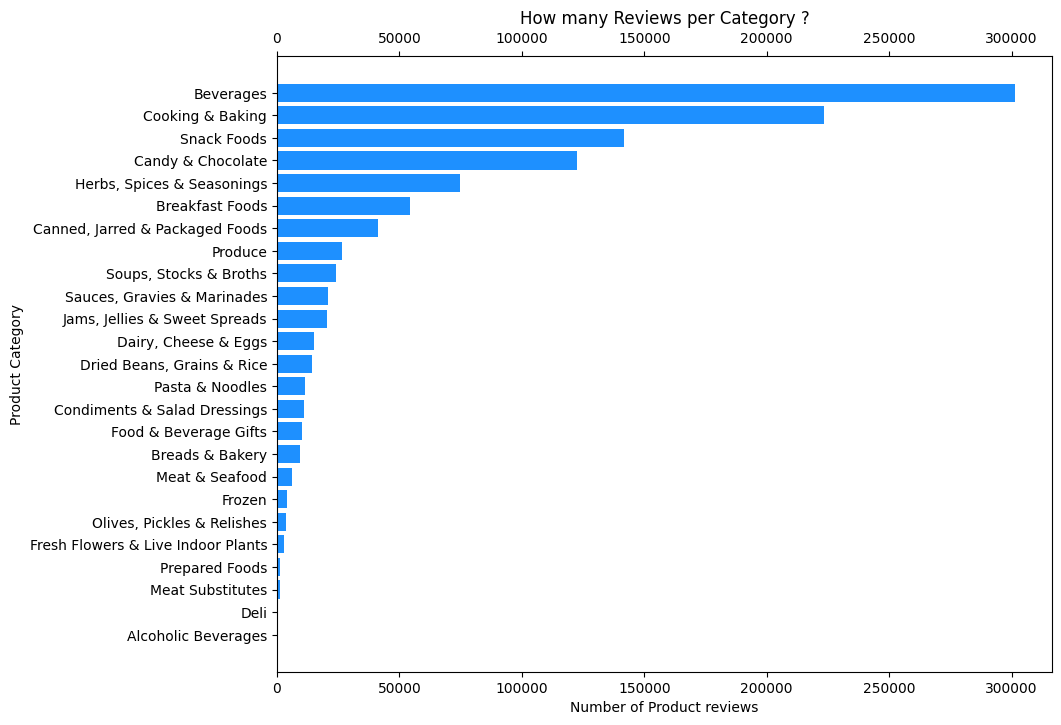

In [33]:
# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(10,8))
ax.barh(popular_counts.index, popular_counts.values, color='dodgerblue')
ax.set_xlabel('Number of Product reviews')
ax.set_ylabel('Product Category')
ax.set_title('How many Reviews per Category ?')
ax.invert_yaxis()
plt.tick_params(axis='x', which='both', top=True, labeltop=True)
popular_counts = popular_counts.sort_values(ascending=False)
print(popular_counts.head(10))
plt.show()

###Finding number of ratings per user

In [34]:
ratings_per_user = merged_df['reviewerID'].value_counts(sort=True, ascending=False) 

In [35]:
ratings_per_user.mean()

8.965481270000627

In [36]:
print(ratings_per_user[:100])
print("total users: ",len(ratings_per_user))

A1LACH6MLQWZ      565
A2GJX2KCUSR0EI    417
A1GQAKL9CGQLP1    415
A2C9XE9I8RSKNX    382
A2XKJ1KX6XUHYP    364
                 ... 
A100WO06OQR8BQ    112
A3E5V5TSTAY3R9    112
A3J0VW0KVW3UQ     111
A2HMF8ZR67BNZS    111
A353U0L2HAMSHV    111
Name: reviewerID, Length: 100, dtype: int64
total users:  127496


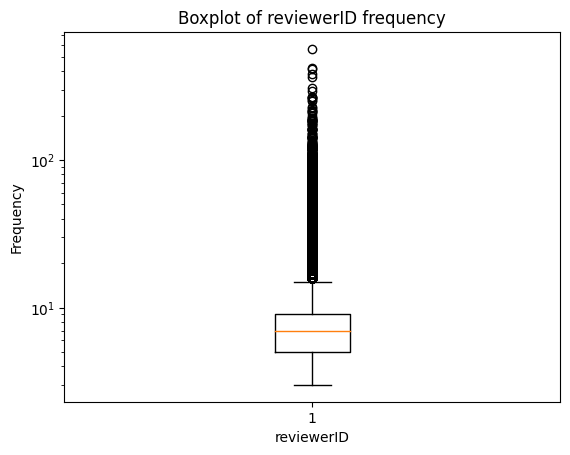

In [37]:
# create a boxplot of merged_df['reviewerID'].value_counts()
plt.boxplot(ratings_per_user)
plt.yscale('log')
# set the x-axis label
plt.xlabel('reviewerID')

# set the y-axis label
plt.ylabel('Frequency')

# set the title of the plot
plt.title('Boxplot of reviewerID frequency')

# display the plot
plt.show()

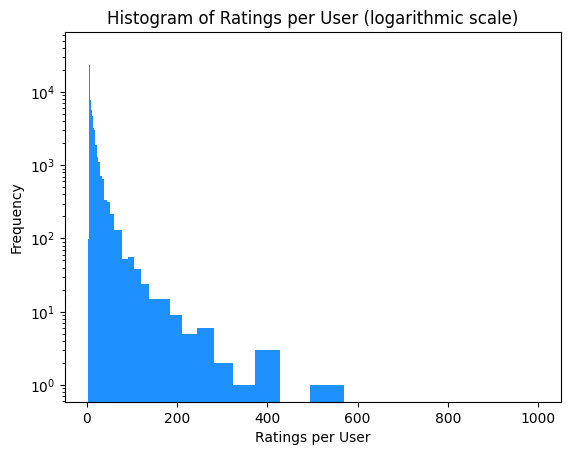

In [38]:

# Define the bins
bins = np.logspace(0, 3, num=50)

# Create histogram
plt.hist(ratings_per_user, bins=bins, log=True, color='dodgerblue')

# Set x-axis labels and title
plt.xlabel('Ratings per User')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings per User (logarithmic scale)')

# Show plot
plt.show()

### Ratings frequency

In [39]:
ratings_freq = merged_df['overall'].value_counts() 

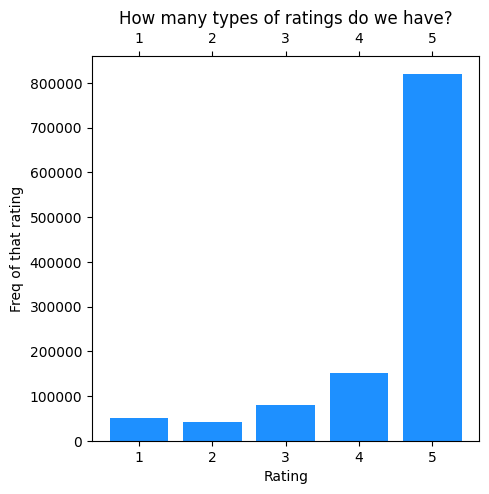

In [40]:

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(5,5))
ax.bar(ratings_freq.index, ratings_freq.values, color='dodgerblue')
ax.set_xlabel('Rating')
ax.set_ylabel('Freq of that rating')
ax.set_title('How many types of ratings do we have?')

plt.tick_params(axis='x', which='both', top=True, labeltop=True)

#plt.xticks(rotation=90)
#ax.set_xscale('log')
#ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()

In [41]:
ratings_freq.mean()

228612.6

### On an average how many ratings per product



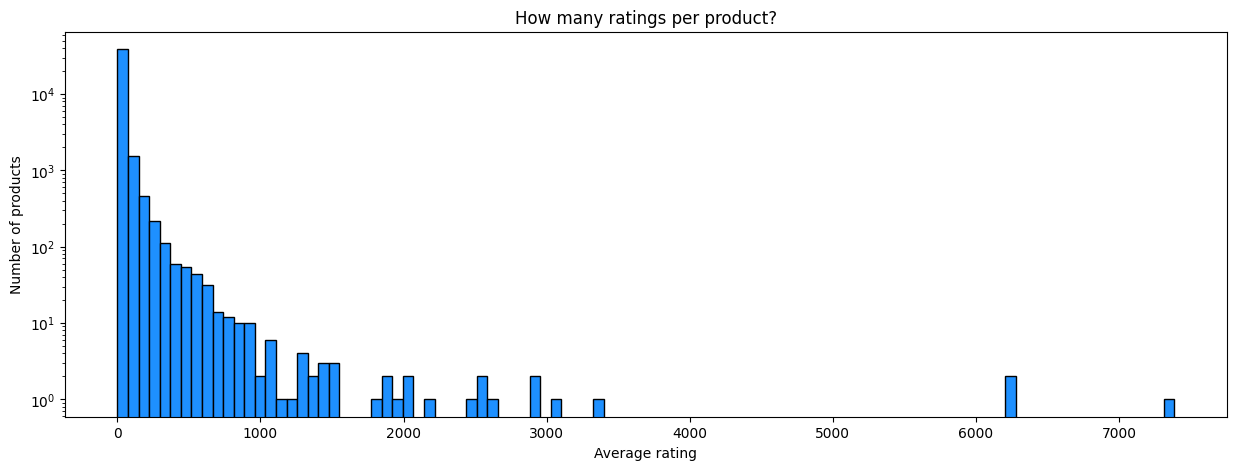

In [42]:
fig, ax = plt.subplots(figsize=(15,5))

# Calculate the average number of ratings per product
ratings_per_product = merged_df.groupby("asin")["overall"].count()

# Plot the histogram
plt.hist(ratings_per_product, bins=100, color='dodgerblue', log=True,edgecolor='black')
plt.title("How many ratings per product?")
plt.xlabel("Average rating")
plt.ylabel("Number of products")
plt.show()

In [43]:
ratings_per_product = merged_df.groupby("asin")["overall"].count()
ratings_per_product.mean()

27.69047965116279

###Finding the average number of rating for each products category - this shows what categories ppl are most interested in. (Ans: Ratings are equally distributed) - this could be a useless metric

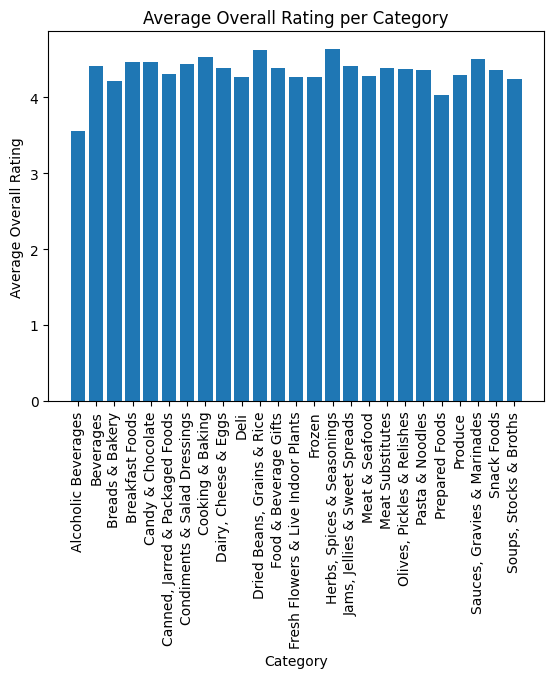

In [44]:
# Calculate the average overall rating for each category
avg_ratings = merged_df.groupby('category')['overall'].mean()

# Create a bar plot of the average ratings per category
plt.bar(avg_ratings.index, avg_ratings.values)

# Set x-axis labels and title
plt.xlabel('Category')
plt.ylabel('Average Overall Rating')
plt.title('Average Overall Rating per Category')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Show plot
plt.show()

### Top N Products! What are the most popular Products? 

In [45]:
popular_products = merged_df.groupby('asin')['overall'].count().sort_values(ascending=False).head(20)
# Create a new DataFrame with the top products
top_products_df = pd.DataFrame(columns=['Title', 'Category', 'Description', 'Number of Reviews','ASIN'])

for asin, count in popular_products.items():
    product = merged_df[merged_df['asin'] == asin].iloc[0]
    row = {'Title': product['title'], 'Category': product['category'], 'Description': product['description'], 'Number of Reviews': count, 'ASIN': product['asin']}
    top_products_df = pd.concat([top_products_df, pd.DataFrame([row])], ignore_index=True)

display(top_products_df)

,Title,Category,Description,Number of Reviews,ASIN
0,"KIND Bars, Dark Chocolate Nuts &amp; Sea Salt,...",Snack Foods,[These bars are where our journey started and ...,7387,B00BUKL666
1,"Kind Bars, Madagascar Vanilla Almond, Gluten F...",Snack Foods,[These bars are where our journey started and ...,6228,B008QMX2SG
2,"KIND Bars, Dark Chocolate Chili Almond, Gluten...",Breakfast Foods,[These bars are where our journey started and ...,6221,B00D3M2QP4
3,"KIND Bars, Caramel Almond and Sea Salt, Gluten...",Snack Foods,[These bars are where our journey started and ...,3387,B00R7PWK7W
4,"YumEarth Organic Lollipops, Assorted Flavors, ...",Candy & Chocolate,[Our pops are tops! YumEarth Organic Lollipops...,3030,B000X3TPHS
5,Twinings of London Pure Camomile Herbal Tea Ba...,Beverages,[Camomile herb teas has long been a European f...,2922,B0001LO3FG
6,Twinings of London English Afternoon Black Tea...,Beverages,[First started as much needed refreshment betw...,2922,B000F4DKAI
7,"KIND Bars, Dark Chocolate Nuts &amp; Sea Salt,...",Snack Foods,[These bars are where our journey started and ...,2637,B00KSN9TME
8,"Planters Peanuts, Honey Roasted &amp; Salted, ...",Cooking & Baking,[Nuts are the heroes of wholesome snacking. An...,2560,B000U0OUP6
9,"Planters Dry Roasted Peanuts, Dry Roasted, Lig...",Cooking & Baking,[PLANTERS has been an American favorite for ov...,2555,B000E1FZHS
